In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = datasets.FashionMNIST("D:\git_projects\DataSets", download = False, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST("D:\git_projects\DataSets", download = False, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [4]:
images, labels = next(iter(trainloader))

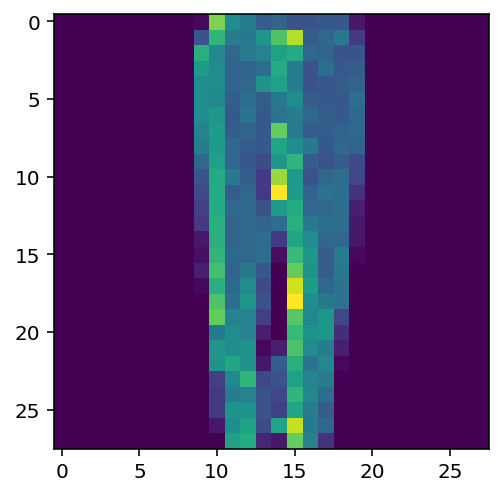

In [5]:
plt.imshow(images[6].view(28, 28))

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim = 1)

In [7]:
model = Network()

In [8]:
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [9]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.NLLLoss()

In [10]:
from tqdm import tqdm

In [11]:
EPOCHS = 10
train_errors = []
test_errors = []

for epoch in tqdm(range(EPOCHS)):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                ops = model(images)
                test_loss += criterion(ops, labels).item()
                ps = torch.exp(ops)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_errors.append(running_loss/len(trainloader))
        test_errors.append(test_loss/len(testloader))
        model.train()
        print(f"Epochs: {epoch+1}/{EPOCHS}",
              f"Train Loss: {train_errors[-1]}",
              f"Test Loss: {test_errors[-1]}",
              f"Accuracy: {accuracy/len(testloader)}")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epochs: 1/10 Train Loss: 0.5358095396874047 Test Loss: 0.4564796462180508 Accuracy: 0.8284235596656799


 10%|████████▎                                                                          | 1/10 [00:19<02:59, 19.94s/it]

Epochs: 2/10 Train Loss: 0.40364624536050153 Test Loss: 0.41859973976566534 Accuracy: 0.8472332954406738


 20%|████████████████▌                                                                  | 2/10 [00:40<02:42, 20.26s/it]

Epochs: 3/10 Train Loss: 0.3638569520893636 Test Loss: 0.3743832139832199 Accuracy: 0.8625597357749939


 30%|████████████████████████▉                                                          | 3/10 [01:01<02:23, 20.46s/it]

Epochs: 4/10 Train Loss: 0.3407638553204313 Test Loss: 0.36526692872214467 Accuracy: 0.8673368096351624


 40%|█████████████████████████████████▏                                                 | 4/10 [01:24<02:06, 21.09s/it]

Epochs: 5/10 Train Loss: 0.32306789924531604 Test Loss: 0.3763773930110749 Accuracy: 0.8611664175987244


 50%|█████████████████████████████████████████▌                                         | 5/10 [01:46<01:46, 21.31s/it]

Epochs: 6/10 Train Loss: 0.3103004152268997 Test Loss: 0.3443293814446516 Accuracy: 0.8762937784194946


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [02:07<01:25, 21.33s/it]

Epochs: 7/10 Train Loss: 0.29590738881657375 Test Loss: 0.3445524344588541 Accuracy: 0.8760947585105896


 70%|██████████████████████████████████████████████████████████                         | 7/10 [02:29<01:04, 21.43s/it]

Epochs: 8/10 Train Loss: 0.2873720079024972 Test Loss: 0.3423569966463526 Accuracy: 0.8793789744377136


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [02:51<00:43, 21.59s/it]

Epochs: 9/10 Train Loss: 0.27922976901854024 Test Loss: 0.35378581437335654 Accuracy: 0.8728104829788208


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [03:12<00:21, 21.54s/it]

Epochs: 10/10 Train Loss: 0.27192834563759855 Test Loss: 0.32865705810914375 Accuracy: 0.8801751732826233


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [03:34<00:00, 21.40s/it]


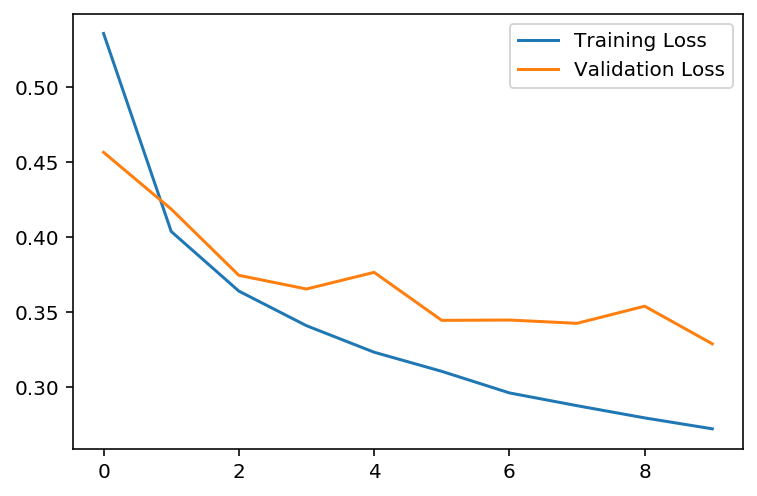

In [12]:
plt.plot(train_errors, label = "Training Loss")
plt.plot(test_errors, label = "Validation Loss")
plt.legend()

In [13]:
model.eval()

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [14]:
images, labels = next(iter(testloader))

In [15]:
inp = images[8]

In [16]:
with torch.no_grad():
    op = model(inp)

In [17]:
op_prob = torch.exp(op)

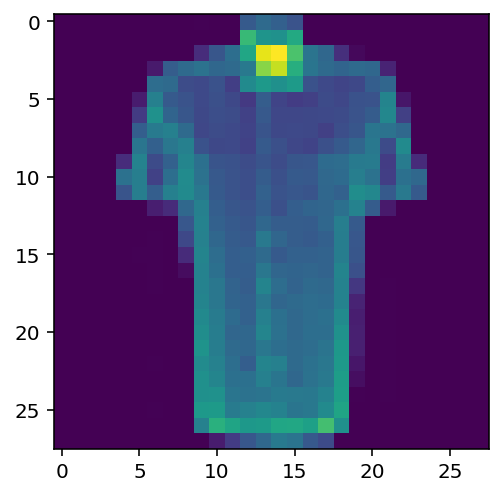

In [18]:
plt.imshow(inp.view(28, 28))

In [19]:
torch.argmax(op_prob)

tensor(6)

In [20]:
labels[8]

tensor(6)

In [21]:
import numpy as np
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

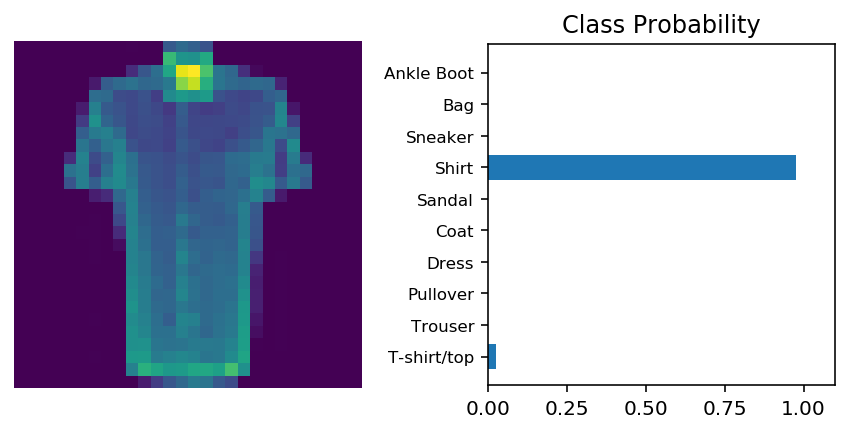

In [22]:
view_classify(inp, op_prob)

In [24]:
model.state_dict().keys()

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])

In [25]:
model.train()

print(model.state_dict().keys())

odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


In [26]:
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[ 7.1569e-02,  5.2927e-02,  1.1445e-01,  ...,  3.5893e-02,
          7.5674e-02,  7.2017e-02],
        [ 4.8807e-02,  9.5589e-02,  1.1142e-01,  ...,  1.4564e-02,
          1.1011e-01,  1.1362e-01],
        [ 4.2033e-02,  3.1027e-02,  2.3274e-02,  ...,  2.0408e-02,
          2.9573e-02,  1.0470e-02],
        ...,
        [ 2.6975e-03,  7.0456e-05, -2.5790e-02,  ...,  2.4144e-02,
         -1.4130e-02, -2.6736e-02],
        [-4.7735e-02, -4.8972e-02, -1.4024e-02,  ..., -6.9796e-03,
         -3.9853e-02, -2.0528e-02],
        [ 2.6666e-02,  1.5589e-02,  5.1327e-02,  ...,  3.3293e-02,
          7.1819e-02,  2.8744e-02]])), ('fc1.bias', tensor([-0.1043, -0.0975, -0.0332, -0.0296, -0.0144, -0.0490, -0.0474, -0.0204,
        -0.0527, -0.0084, -0.0310, -0.0366,  0.0077, -0.1030, -0.0345, -0.0595,
        -0.0714, -0.0876, -0.0820, -0.0282, -0.0160, -0.0709,  0.0202, -0.0372,
         0.0216, -0.0735, -0.0282, -0.0914,  0.0092, -0.0624, -0.1297, -0.0540,
     

In [27]:
#Saving parameters of models

torch.save(model.state_dict(), "checkpoint.pth")

In [29]:
print(model)
print(model.state_dict().keys())

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)
odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


In [30]:
#Fuction to Load model parameters
def load_model_params(path):
    model = Network()
    model.load_state_dict(torch.load(path))
    
    return model

In [31]:
# Checking Model after re-loading
model_2 = load_model_params("checkpoint.pth")

model_2.eval()

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [32]:
with torch.no_grad():
    output = model_2(inp)

In [33]:
output_prob = torch.exp(output)

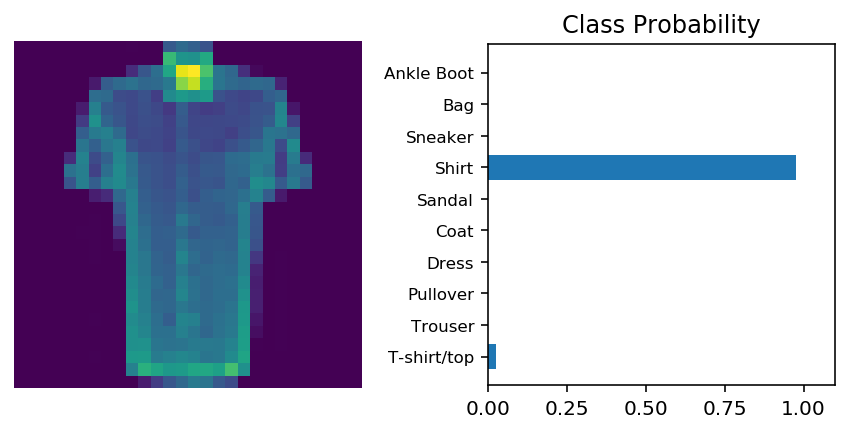

In [34]:
view_classify(inp, output_prob)